In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<p style="font-family: Arial; font-size: 40px;">Reading the file
</p>

In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:
data.shape

(8790, 10)

In [4]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


<p style="font-family: Arial; font-size: 40px;">Data exploration
</p>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
missing_values=data.isnull().sum()
missing_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
duplicated_values=data.duplicated().sum()
duplicated_values

0

In [9]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<p style="font-family: Arial; font-size: 40px;">Data cleaning
</p>

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.dropna(inplace = True)

In [12]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [13]:
data.rename(columns={'date_added':'Date',"listed_in":"category"},inplace=True)

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data["Date"] = data["Date"].astype(str).apply(lambda x: x.replace('/', '-'))
data['Date']

0       2021-09-25
1       2021-09-24
2       2021-09-24
3       2021-09-22
4       2021-09-24
           ...    
8785    2017-01-17
8786    2018-09-13
8787    2016-12-15
8788    2018-06-23
8789    2018-06-07
Name: Date, Length: 8790, dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   Date          8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   category      8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [17]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<p style="font-family: Arial; font-size: 60px;">1. Univariate Analysis
</p>

<p style="font-family: Arial; font-size: 40px;">Categorical
</p>

<p style="font-family: Arial; font-size: 20px;">Displaying either it is movie or show type
</p>

In [18]:
len(data["show_id"].unique())

8790

In [19]:
showtype = data['type'].value_counts().reset_index()
showtype

,type,count
0,Movie,6126
1,TV Show,2664


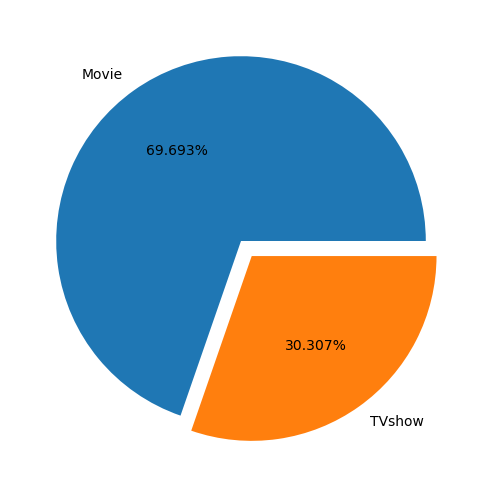

In [20]:
plt.figure(figsize=(20,6))
plt.pie(showtype['count'],labels=['Movie','TVshow'],autopct='%1.3f%%',explode=[0,0.1])
plt.show()

<p style="font-family: Arial; font-size: 20px;">Directors names given or not
</p>

In [21]:
directors = data['director'].value_counts()
directors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [22]:
given_directors = directors.sum() - directors[0]
print(f'given directors = {given_directors}')

given directors = 6202


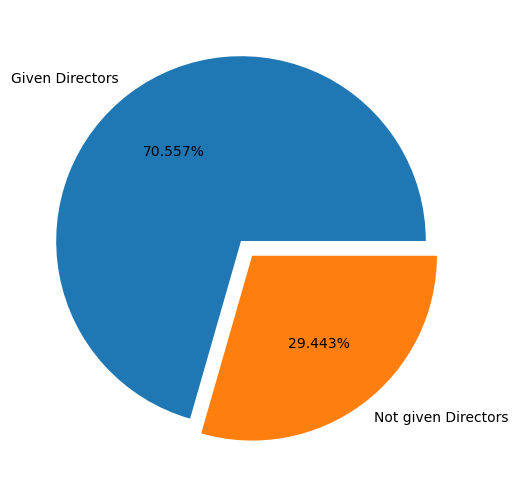

In [23]:
plt.figure(figsize=(20,6))
plt.pie([given_directors, directors[0]], labels=['Given Directors', 'Not given Directors'], autopct='%1.3f%%', explode=[0,0.1])
plt.show()

In [24]:
country = data['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(30)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


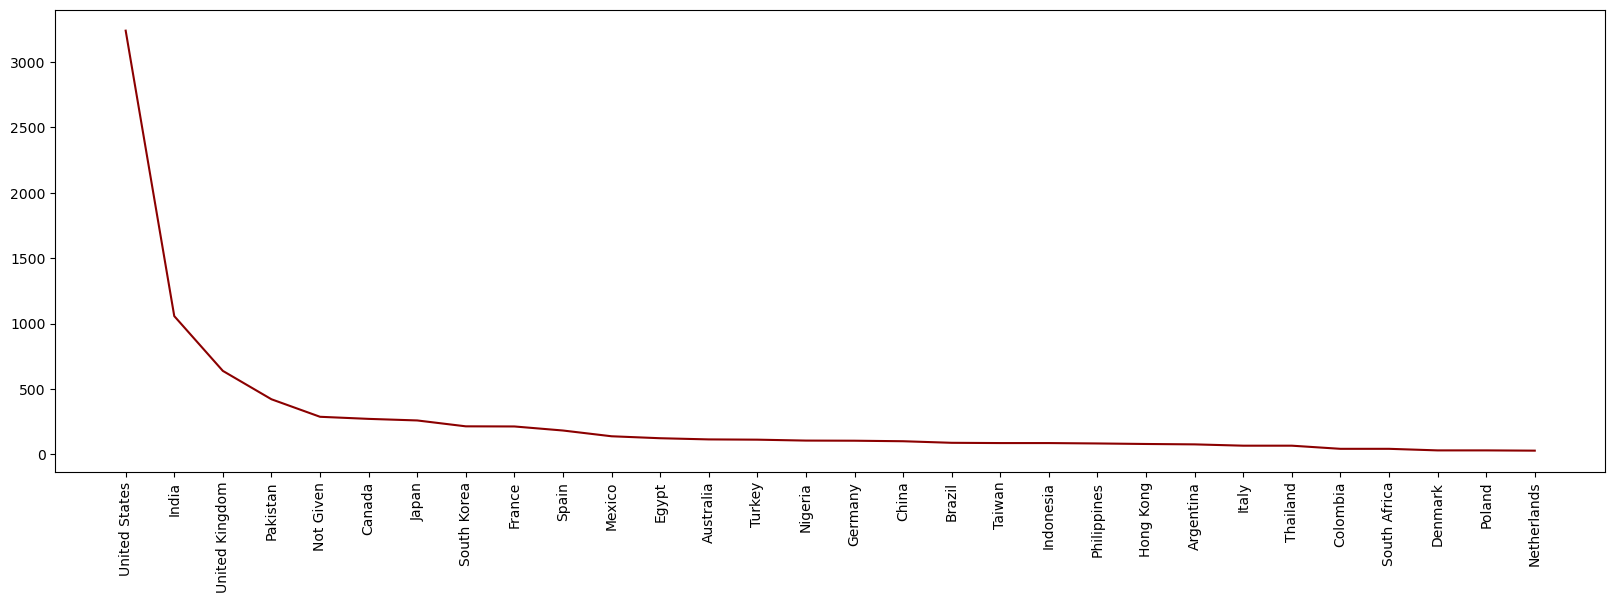

In [25]:
plt.figure(figsize=(20,6))
plt.plot(country['country'],country['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

In [26]:
top10_country=country.sort_values(by='count',ascending=False).head(10)
top10_country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


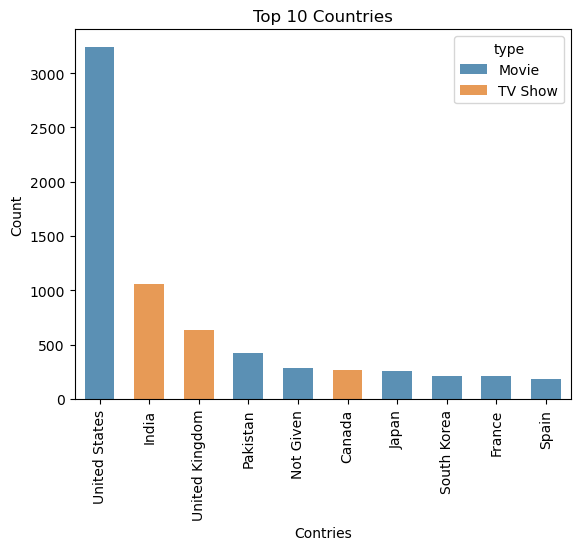

In [27]:
sns.barplot(data=top10_country,x='country',y='count',hue=data['type'],alpha=0.8,width=0.6)
plt.ylabel('Count')
plt.xlabel('Contries')
plt.title('Top 10 Countries')
plt.xticks(rotation=90)
plt.show()

<p style="font-family: Arial; font-size: 20px;">The number of movies a director did
</p>

In [28]:
directors = data.groupby(['director', 'type'])['director'].value_counts().reset_index().head(15)
directors

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


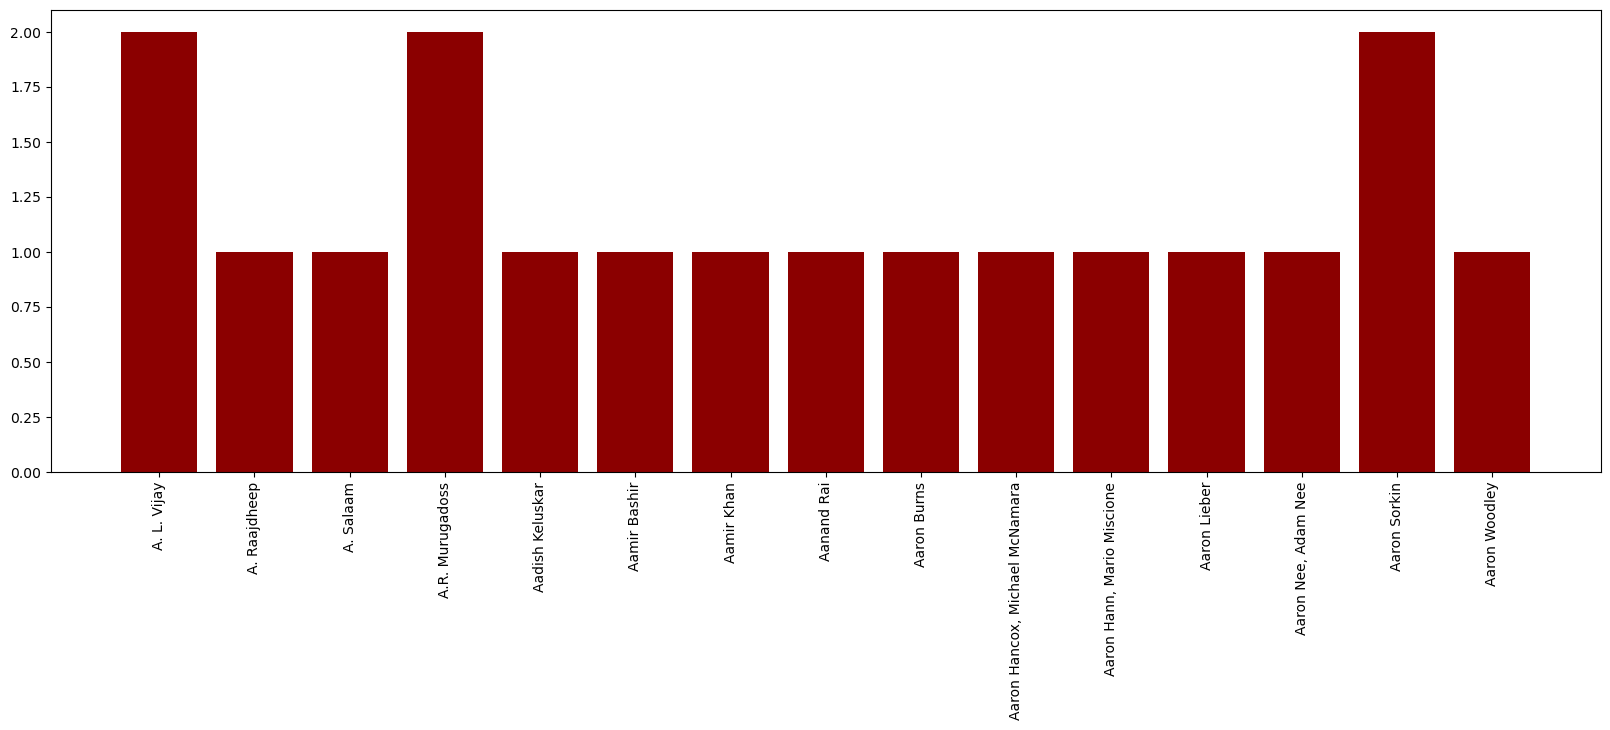

In [29]:
plt.figure(figsize=(20,6))
plt.bar(directors['director'],directors['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

<p style="font-family: Arial; font-size: 40px;">Numerical
</p>

<p style="font-family: Arial; font-size: 20px;">Release Year
</p>

<p style="font-family: Arial; font-size: 20px;">Caluclating the mean, median, mode and standard deviation
</p>

In [30]:
mean_release_year = data['release_year'].mean()
print(f"Mean: {mean_release_year}")

Mean: 2014.183162684869


In [31]:
median_release_year = data['release_year'].median()
print(f"Median: {median_release_year}")

Median: 2017.0


In [32]:
mode_release_year = data['release_year'].mode()[0]  # mode() returns a Series, take the first value
print(f"Mode: {mode_release_year}")

Mode: 2018


In [33]:
std_release_year = data['release_year'].std()
print(f"Standard Deviation: {std_release_year}")

Standard Deviation: 8.82546602834756


<p style="font-family: Arial; font-size: 30px;">Histogram
</p>

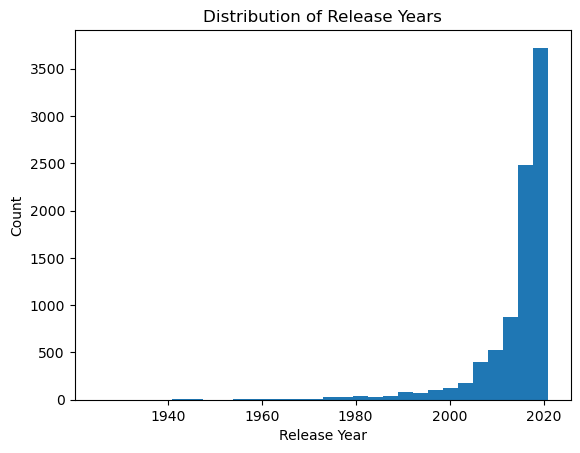

In [34]:
data['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

<p style="font-family: Arial; font-size: 30px;">Box-Plot
</p>

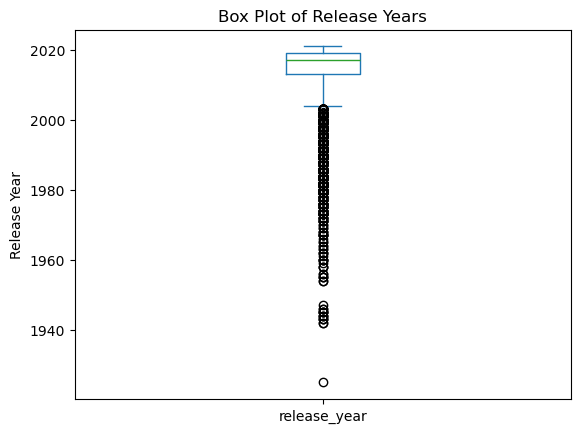

In [35]:
data['release_year'].plot(kind='box')
plt.title('Box Plot of Release Years')
plt.ylabel('Release Year')
plt.show()

<p style="font-family: Arial; font-size: 60px;">2. Multivariate Analysis
</p>

<p style="font-family: Arial; font-size: 40px;"> Numerical & Numerical
</p>

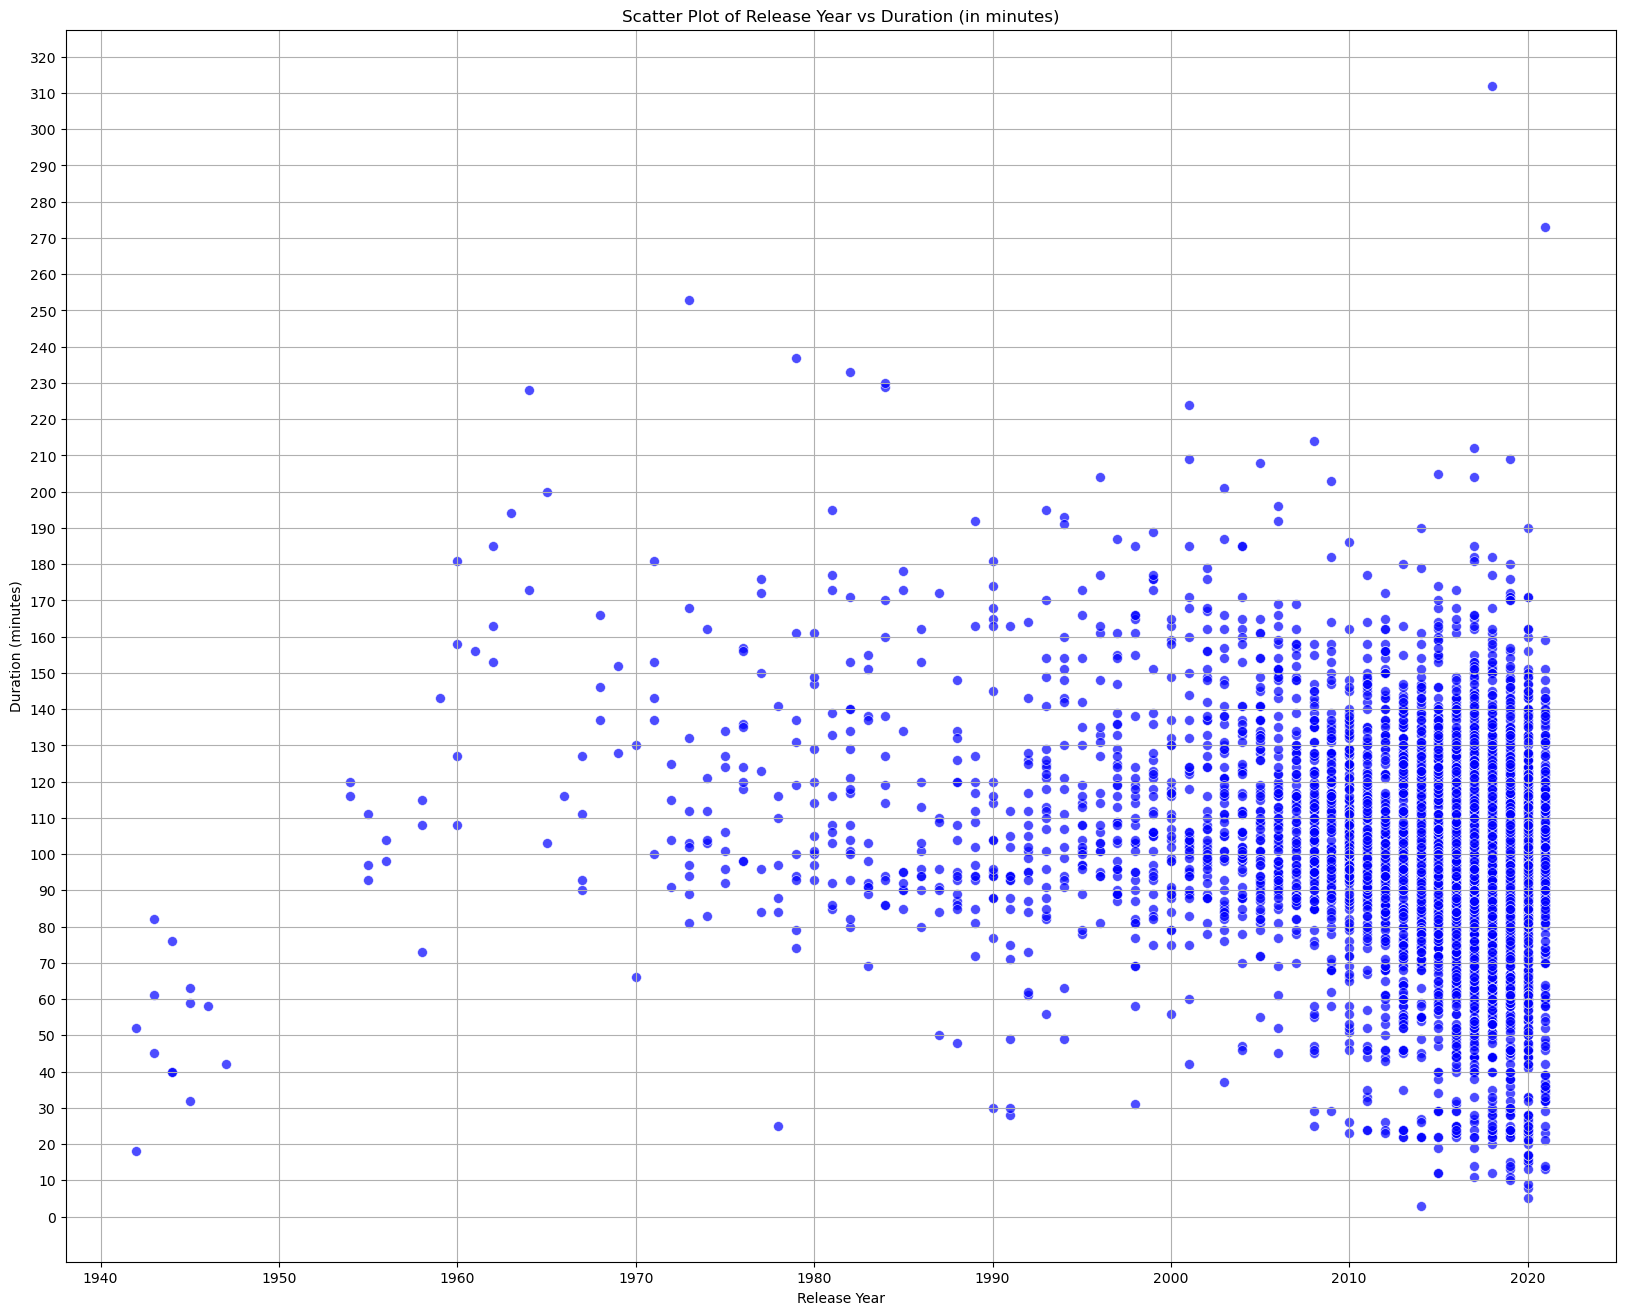

In [36]:
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
data_movies = data.dropna(subset=['duration'])
plt.figure(figsize=(20, 16))
plt.scatter(data_movies['release_year'], data_movies['duration'], c='blue', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Release Year vs Duration (in minutes)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.yticks(range(0, int(data_movies['duration'].max()) + 10, 10))
plt.show()

<p style="font-family: Arial; font-size: 30px;"> We can see that more movies released from the year 2000 onwards and duration beging from 40 minutes to 160 minutes.
</p>

In [37]:
correlation = data_movies['release_year'].corr(data_movies['duration'])
correlation

-0.20624804433430965

<p style="font-family: Arial; font-size: 40px;">Categorical & Categorical
</p>

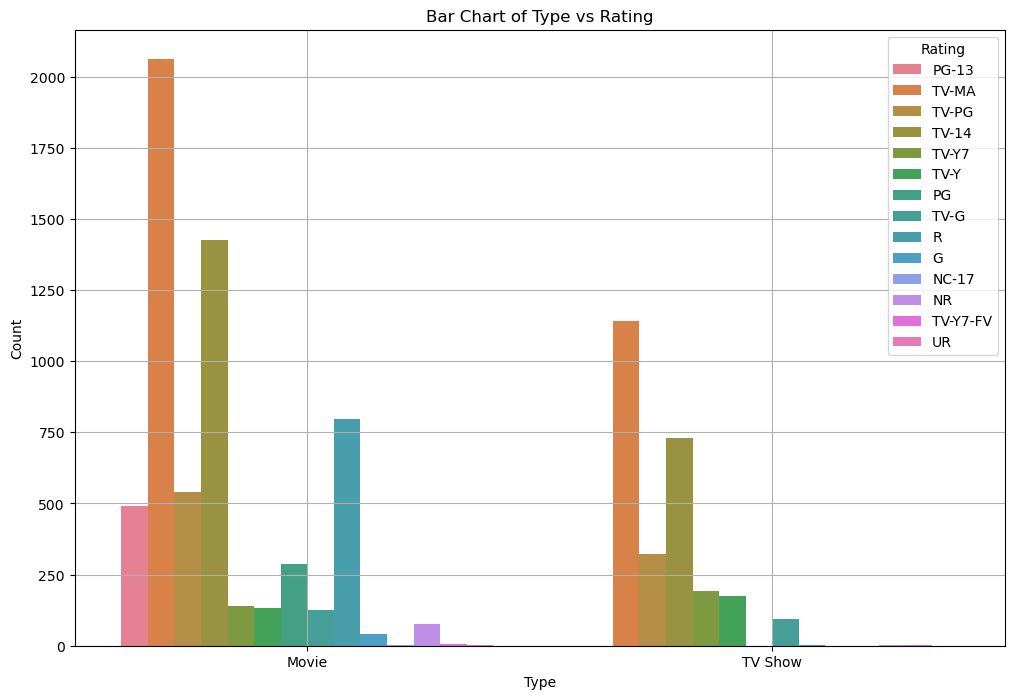

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='type', hue='rating')
plt.title('Bar Chart of Type vs Rating')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.grid(True)
plt.show()

<p style="font-family: Arial; font-size: 30px;">We can see that more than 2000 movies are rated as PG -13 and more than 1250 Tv-shows are rated as PG -13
</p>

In [39]:
contingency_table = pd.crosstab(data['type'], data['rating'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 1044.4980315614323
P-value: 4.828706834274552e-215
Degrees of Freedom: 13
Expected Frequencies:
[[2.85740614e+01 2.09078498e+00 5.50573379e+01 2.00018430e+02
  3.41494881e+02 5.56845734e+02 1.50327440e+03 1.53324232e+02
  2.23365529e+03 6.00055290e+02 2.13260068e+02 2.32077133e+02
  4.18156997e+00 2.09078498e+00]
 [1.24259386e+01 9.09215017e-01 2.39426621e+01 8.69815700e+01
  1.48505119e+02 2.42154266e+02 6.53725597e+02 6.66757679e+01
  9.71344710e+02 2.60944710e+02 9.27399317e+01 1.00922867e+02
  1.81843003e+00 9.09215017e-01]]


<p style="font-family: Arial; font-size: 40px;">Numerical & Categorical
</p>

<p style="font-family: Arial; font-size: 30px;">T - test
</p>

In [40]:
data_movies = data[data['type'] == 'Movie']
data_movies = data_movies.dropna(subset=['duration'])
group1 = data_movies[data_movies['rating'] == 'PG-13']['duration']
group2 = data_movies[data_movies['rating'] == 'TV-MA']['duration']
if not group1.empty and not group2.empty:
    t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
else:
    print("One or both groups have insufficient data for t-test.")

T-Statistic: 10.667530037804239
P-Value: 5.0645723484613883e-26


<p style="font-family: Arial; font-size: 30px;">Analysis of variance(ANOVA)
</p>

In [41]:
data_movies = data[data['type'] == 'Movie']
data_movies = data_movies.dropna(subset=['duration'])
ratings_groups = data_movies.groupby('rating')['duration'].apply(list)
anova_result = f_oneway(*ratings_groups)
f_statistic = anova_result.statistic
p_value = anova_result.pvalue
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 98.10824154785928
P-Value: 9.647734102972962e-240


<p style="font-family: Arial; font-size: 30px;">Trend of average duration across the categorical attribute.
</p>

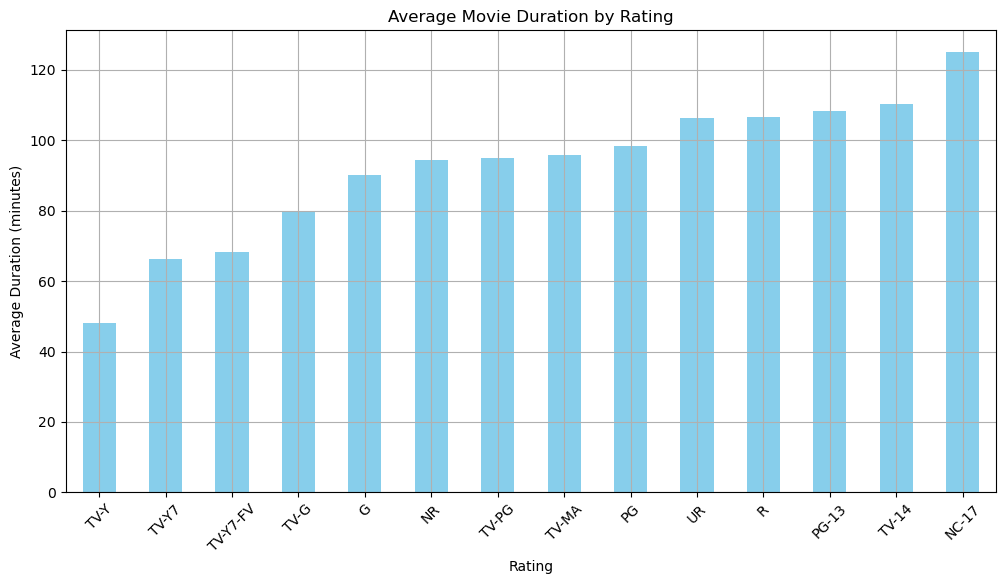

In [42]:
data_movies = data[data['type'] == 'Movie']
data_movies = data_movies.dropna(subset=['duration'])
mean_duration_by_rating = data_movies.groupby('rating')['duration'].mean()
mean_duration_by_rating = mean_duration_by_rating.sort_values()
plt.figure(figsize=(12, 6))
mean_duration_by_rating.plot(kind='bar', color='skyblue')
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

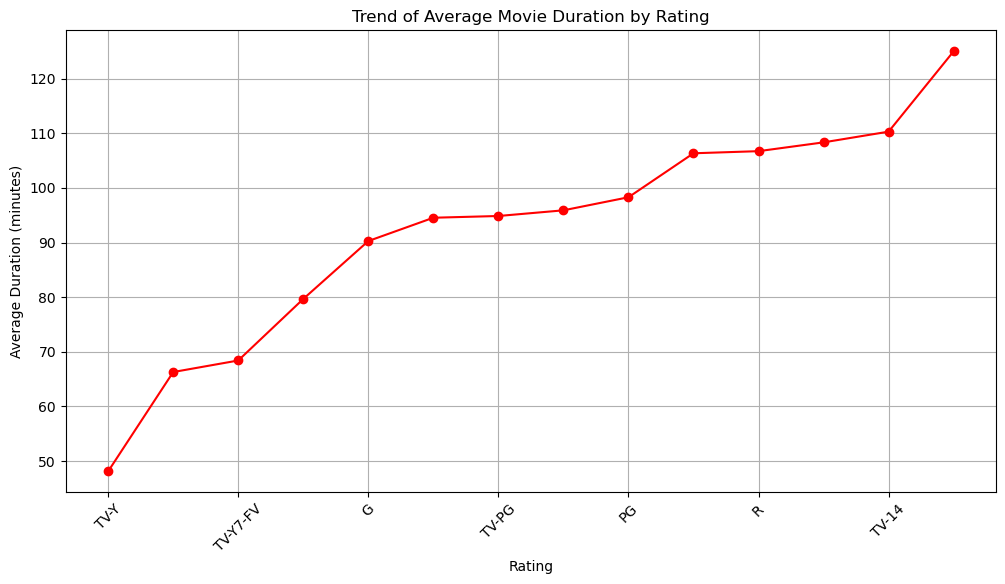

In [43]:
plt.figure(figsize=(12, 6))
mean_duration_by_rating.plot(kind='line', marker='o', color='red')
plt.title('Trend of Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h2>Summary of analysis</h2>
<p style="font-family: Arial; font-size: 30px;">We can see that their is a rise in number of movies made in each decade , from 1940s onwards and in last two decades their is sharp increase in number of movies made.We can see that more than 2000 movies are rated as PG -13 and more than 1250 Tv-shows are rated as PG -13 and most of the movies are between a duration time of 40 to 160 minutes.We can see that united states has has the most number of movies which is above 3000 , followed by India which are above 1000 according to this dataset.In this dataset 70 percent data is of movies and 30 percent data is of tv shows and for 70 percent of movies and tv shows directors names are given and for 30 percent directors names are not given</p>